In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:


def plot_histogram_and_cdf(img, title):
    """Plot both histogram and CDF for an image"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

    # Calculate histogram
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Calculate CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    # Plot histogram
    ax1.plot(hist)
    ax1.set_title(f'{title} - Histogram')
    ax1.set_xlabel('Pixel Value')
    ax1.set_ylabel('Frequency')
    ax1.grid(True)

    # Plot CDF
    ax2.plot(cdf_normalized)
    ax2.set_title(f'{title} - CDF')
    ax2.set_xlabel('Pixel Value')
    ax2.set_ylabel('Cumulative Frequency')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()



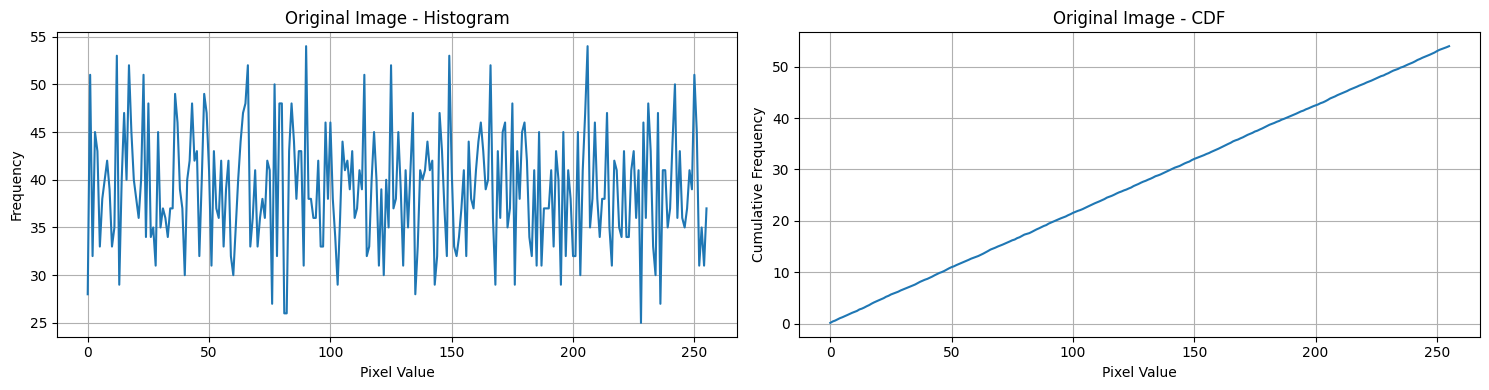

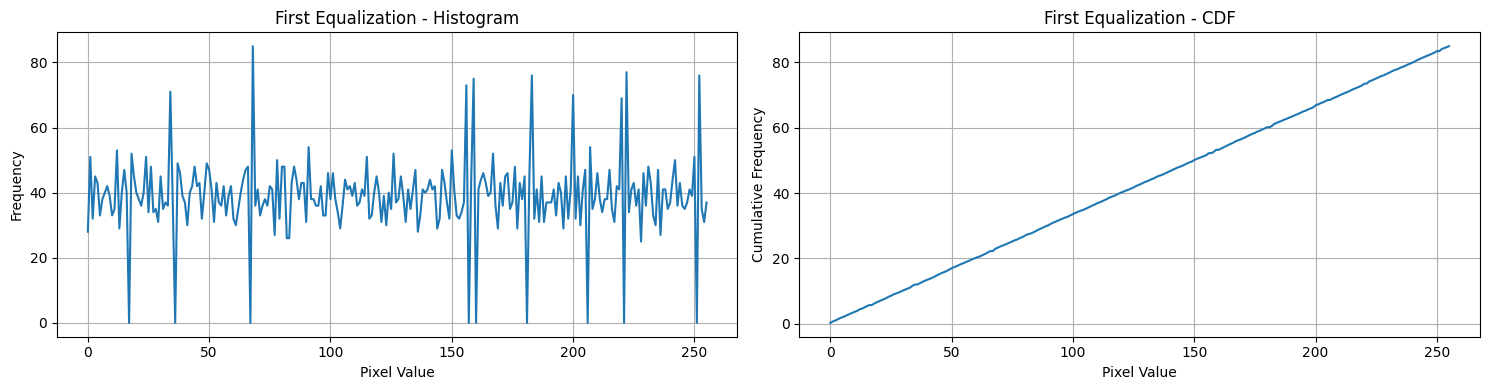

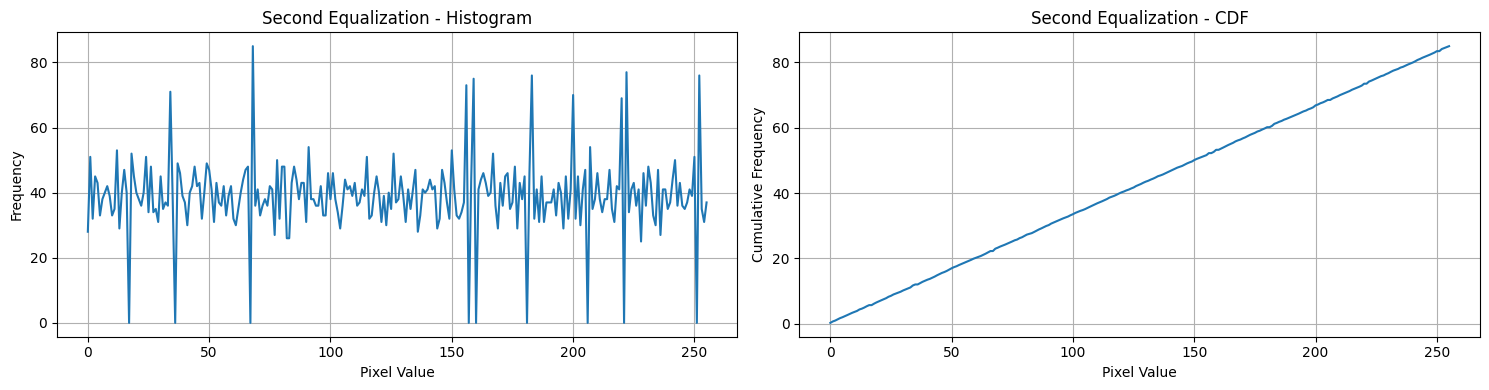

Maximum difference between first and second equalization: 0


In [3]:
# Create a sample image
img = np.random.randint(0, 256, (100, 100), dtype=np.uint8)

# First equalization
hist_eq1 = cv2.equalizeHist(img)

# Second equalization
hist_eq2 = cv2.equalizeHist(hist_eq1)

# Plot results
plot_histogram_and_cdf(img, "Original Image")
plot_histogram_and_cdf(hist_eq1, "First Equalization")
plot_histogram_and_cdf(hist_eq2, "Second Equalization")

# Show that the images are identical after first equalization
difference = hist_eq2 - hist_eq1
print("Maximum difference between first and second equalization:", np.max(np.abs(difference)))